<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [49]:
import pandas as pd
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [3]:
# Read CSV
#house_csv = "../DATA/Sacramentorealestatetransactions.csv"
house_csv = "Sacramento_transactions.csv"
data = pd.read_csv(house_csv)
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [0]:
# ANSWER price

#### 2.2 List all possible variables which might be Predictor variable.

In [0]:
# ANSWER Independent/Predictor variables = beds, bath, sq_ft, type, latitude, longitude

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [4]:
# ANSWER
data.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [0]:
# ANSWER using baths as predictor as it has highest correlation coefficient

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [0]:
# ANSWER

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [39]:
# ANSWER 
#X = data['baths'].values
X = data['sq__ft'].values
Y = data['price'].values
#Y = data['sq__ft'].values
x_mean = X.mean()
y_mean = Y.mean()
print(X.shape)
print(data['baths'].shape[0])
print(X[0], x_mean)


(985,)
985
836 1314.9167512690356


##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [40]:
# ANSWER
den=0
num = 0
for i in range(X.shape[0]):
    num = num + (Y[i]-y_mean)*(X[i]-x_mean)
    den = den + (X[i]-x_mean)**2

beta1 = num/den    

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [41]:
# ANSWER
beta0 = y_mean - beta1*x_mean

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [42]:
# ANSWER
Yhat = beta0 + beta1*X

##### 2.7.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [43]:
# ANSWER
residual = Y-Yhat

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [44]:
# ANSWER
def calculate_R_square(Y,Yhat):
    ss_tot = 0
    ss_res = 0
    y_mean = Y.mean()
    for i in range(Y.shape[0]):
        ss_tot = ss_tot + (Y[i]-y_mean)
        ss_res = ss_res + (Y[i]-Yhat[i])
        
    r_squared = 1 -(ss_res/ss_tot)
        
    return r_squared

calculate_R_square(Y,Yhat)

0.771384136858476

##### 2.7.F [BONUS] Draw Plot of Predicted Line

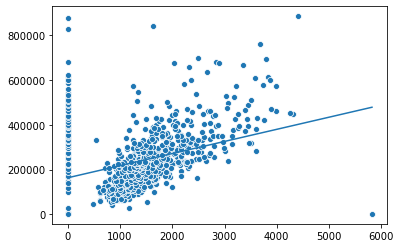

In [60]:
# ANSWER

x_axis = np.arange(X.min(),X.max())
y_axis = beta0 + beta1*x_axis


sns.lineplot(x_axis, y_axis, size)
sns.scatterplot(X,Y)


##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

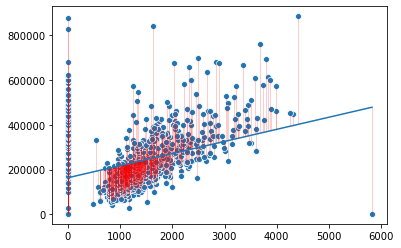

In [73]:
# ANSWER
sns.lineplot(x_axis, y_axis)
sns.scatterplot(X,Y)
for i in range(X.shape[0]):
    #print([Y[i]-Yhat[i],Y[i], Yhat[i], X[i]])
    if Y[i]-Yhat[i] <0:
        #plt.axvline(x=X[i],ymin=Yhat[i]/Y[i],ymax=1)
        sns.lineplot([X[i], X[i]], [Y[i],Yhat[i]], color="red", lw=1, linestyle='solid')

        #plt.axvline(X[i],Yhat[i],Y[i])
    else:
        #plt.axvline(x=X[i],ymin=Y[i]/Yhat[i],ymax=1)
        sns.lineplot([X[i], X[i]], [Yhat[i],Y[i]], color="red", lw=1, linestyle='solid')


### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [74]:
# ANSWER
beta0+beta1*1204

228137.1635919888



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



